In [10]:
import requests
import pandas as pd
import geopandas as gpd
import zipfile

In [3]:
def download_file(url, save_file):
    # Download and save a file from the url
    with open(save_file, 'wb') as f:
        r = requests.get(url)
        f.write(r.content)  

### Volume 3 - Non ABS Structures
Source https://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/1270.0.55.003June%202020?OpenDocument

##### Local Government Areas ASGS Ed 2020 Digital Boundaries in ESRI Shapefile Format 

In [4]:
url = "https://www.abs.gov.au/ausstats/subscriber.nsf/log?openagent&1270055003_lga_2020_aust_shp.zip&1270.0.55.003&Data%20Cubes&D18F1308CA028E03CA258588001CC896&0&June%202020&16.06.2020&Latest"
save_to = "../data/raw/lga_2020_aust_shp.zip"
download_file(url,save_to)

In [9]:
# Open the zip file, and check the csv files inside
z = zipfile.ZipFile(save_to)
z.printdir()

File Name                                             Modified             Size
LGA_2020_AUST.dbf                              2020-05-26 12:26:24        77750
LGA_2020_AUST.prj                              2020-05-26 12:26:24          145
LGA_2020_AUST.shp                              2020-05-26 12:26:24     55635912
LGA_2020_AUST.shx                              2020-05-26 12:26:24         4596
LGA_2020_AUST.xml                              2020-05-25 09:00:28        39277


In [14]:
gdf = gpd.read_file("zip://../data/raw/lga_2020_aust_shp.zip")
gdf.shape

(562, 6)

In [15]:
gdf.head()

,LGA_CODE20,LGA_NAME20,STE_CODE16,STE_NAME16,AREASQKM20,geometry
0,10050,Albury (C),1,New South Wales,305.9459,"POLYGON ((146.82130 -36.04997, 146.82138 -36.0..."
1,10180,Armidale Regional (A),1,New South Wales,7809.4405,"POLYGON ((151.32425 -30.26923, 151.32419 -30.2..."
2,10250,Ballina (A),1,New South Wales,484.9389,"MULTIPOLYGON (((153.57094 -28.87390, 153.57097..."
3,10300,Balranald (A),1,New South Wales,21690.6753,"POLYGON ((143.00432 -33.78165, 143.01538 -33.7..."
4,10470,Bathurst Regional (A),1,New South Wales,3817.8646,"POLYGON ((149.90753 -33.39968, 149.90717 -33.4..."


<AxesSubplot:>

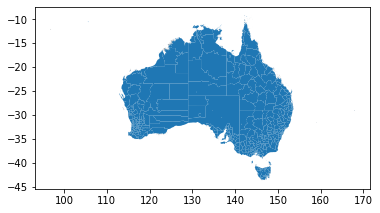

In [16]:
gdf.plot()

##### Non ABS Structures ASGS Ed 2020 Digital Boundaries in Geopackage 

In [5]:
url = "https://www.abs.gov.au/ausstats/subscriber.nsf/log?openagent&1270055003_asgs_2020_vol_3_aust_gpkg.zip&1270.0.55.003&Data%20Cubes&C39FF587B7A8F1B9CA258588001CCFA2&0&June%202020&16.06.2020&Latest"
save_to = "../data/raw/asgs_2020_vol_3_aust_gpkg.zip"
download_file(url,save_to)

In [17]:
# Open the zip file, and check the csv files inside
z = zipfile.ZipFile(save_to)
z.printdir()

File Name                                             Modified             Size
ASGS 2016 Volume 3 2020.gpkg                   2020-05-27 10:03:52    105766912
LGA_2020_AUST.xml                              2020-05-25 09:00:28        39277
SED_2020_AUST.xml                              2020-05-29 09:27:44        38227


In [20]:
gdf = gpd.read_file(z.open("ASGS 2016 Volume 3 2020.gpkg"))
gdf.shape

/home/danph/anaconda3/envs/pysal-workshop/lib/python3.7/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


(450, 4)

In [21]:
gdf.head()

,SED_CODE_2020,SED_NAME_2020,AREA_ALBERS_SQKM,geometry
0,10001,Albury,19487.8332,"POLYGON ((146.92855 -36.09771, 146.92807 -36.0..."
1,10002,Auburn,38.8810,"POLYGON ((151.05568 -33.82490, 151.05579 -33.8..."
2,10003,Ballina,1048.6389,"MULTIPOLYGON (((153.62192 -28.70597, 153.62200..."
3,10004,Balmain,13.1600,"POLYGON ((151.19167 -33.85521, 151.19146 -33.8..."
4,10005,Bankstown,27.3251,"POLYGON ((150.97636 -33.90360, 150.97587 -33.9..."


<AxesSubplot:>

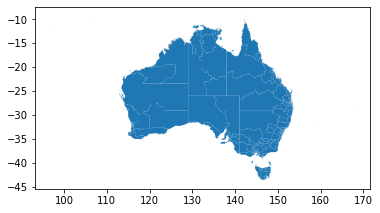

In [23]:
gdf.plot()